In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

x_min, x_max = df["LSTAT"].min(), df["LSTAT"].max()
x_1 = np.linspace(x_min, x_max, 100)
x_2 = np.zeros_like(x_1) + 1
X = np.vstack((x_1, x_2)).T

def neuron2(x,w):
    return x@w

  # Negative slope, intercept 30
Y2 = neuron2(X, w2)

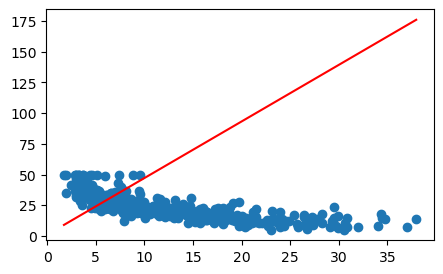

In [4]:
plt.figure(figsize=(5, 3))
plt.scatter(df['LSTAT'], df['MEDV'])
plt.plot(X[:, 0], Y2, c='red')

In [5]:
# Define our mean squared error loss function
def mse_loss(X, y, w):
    y_pred = neuron2(X, w)
    squared_errors = (y_pred - y) ** 2
    return np.mean(squared_errors)

In [6]:
# Define a function to calculate the gradient of MSE loss
def mse_gradient(X, y, w):
    y_pred = neuron2(X, w)
    errors = y_pred - y
    gradient = (2/len(y)) * X.T @ errors
    return gradient

In [19]:
X_true

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64

In [22]:
y_true = df['MEDV']
X_true = np.vstack((df['LSTAT'], np.zeros_like(df["LSTAT"].values))).T

#mse_loss(X_true, y_true, w )
mse_gradient(X_true, y_true,w )

array([1471.85011369,    0.        ])

In [35]:
X_train = np.column_stack([df['LSTAT'], np.ones(len(df))])
y_train = df['MEDV'].values

In [26]:
def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=100, w=None):
    loss_history = []
    w_history = []
    for i in range(n_iterations):
        loss = mse_loss(X, y, w)
        loss_history.append(loss)
        w_history.append(w.copy())
        
        grad = mse_gradient(X, y, w)
        
        w = w - learning_rate * grad
        
    return w, loss_history, w_history

In [27]:
# Define a function for batch gradient descent
def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=100, initial_w=None):

    if initial_w is None:
        w = np.zeros(X.shape[1])
    else:
        w = initial_w.copy()
    
    # Initialize history lists
    loss_history = []
    w_history = []
    
    # Perform gradient descent
    for i in range(n_iterations):
        # Calculate loss
        loss = mse_loss(X, y, w)
        loss_history.append(loss)
        w_history.append(w.copy())
        
        grad = mse_gradient(X, y, w)
        
        w = w - learning_rate * grad
        
    return w, loss_history, w_history

In [32]:
w = np.array([4.61, 1])

In [47]:
w, lh, wh = batch_gradient_descent(X_train, y_train,n_iterations=100, w=w)

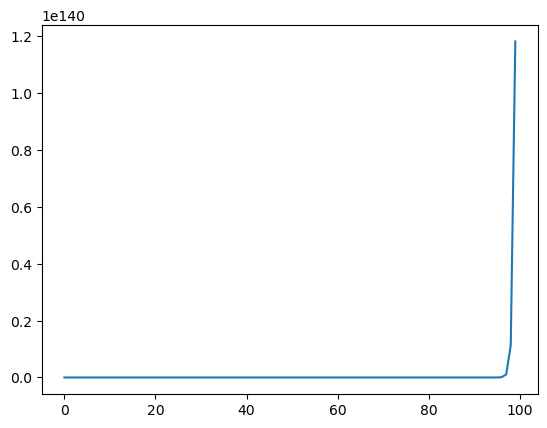

In [48]:
plt.plot(lh)

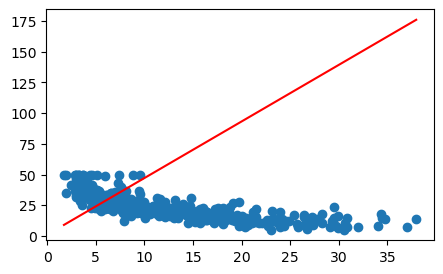

In [49]:
#plt.plot(lh)
#plt.plot(wh)
Y2 = neuron2(X, w2)
plt.figure(figsize=(5, 3))
plt.scatter(df['LSTAT'], df['MEDV'])
plt.plot(X[:, 0], Y2, c='red')

In [57]:
def relu(x):
    return np.maximum(0, x)

In [58]:
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [59]:

def tanh(x):
    return np.tanh(x)

In [60]:
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

In [61]:
x = np.linspace(-10,10,100)

In [64]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

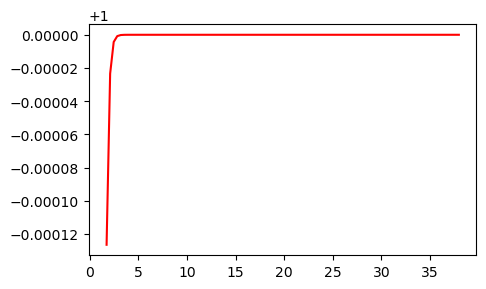

In [69]:
Y2 = neuron3(X, w2)
plt.figure(figsize=(5, 3))


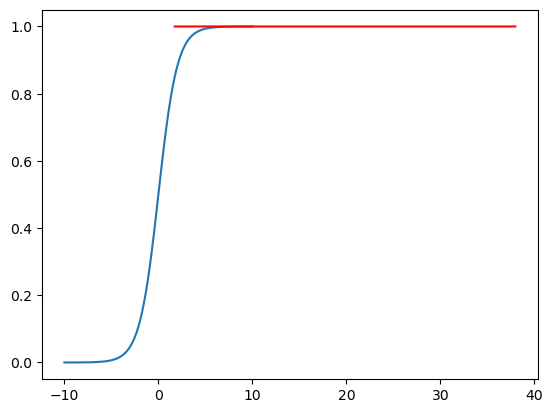

In [71]:
plt.plot(x, sigmoid(x))
plt.plot(X[:, 0], Y2, c='red')

In [72]:
# %%
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [73]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

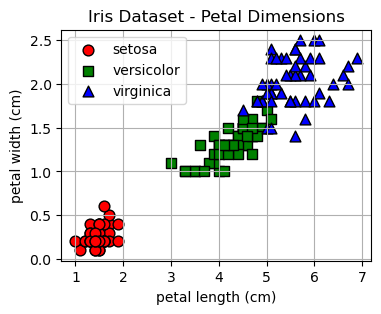

In [75]:
# Visualize the Iris dataset (using petal dimensions)
plt.figure(figsize=(4, 3))
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']
feature_indices = [2, 3]  # Using petal length and width
for i, c, m in zip(range(3), colors, markers):
    plt.scatter(
        X[y == i, feature_indices[0]], 
        X[y == i, feature_indices[1]], 
        c=c, marker=m, s=60,
        edgecolors='k', label=f"{iris.target_names[i]}"
    )
plt.xlabel(iris.feature_names[feature_indices[0]])
plt.ylabel(iris.feature_names[feature_indices[1]])
plt.title("Iris Dataset - Petal Dimensions")
plt.legend()
plt.grid(True)

In [78]:
X[y == 0, feature_indices[0]], X[y == 0, feature_indices[1]], 

(array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
        1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
        1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
        1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4]),
 array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
        0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
        0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
        0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2]))

In [128]:
def neuron3(x,w):
    return sigmoid(x@w)
#def neuron3(x,w):
#    return x@w

In [129]:
w = np.array([4.61, 2, 1])
w = np.array([4.61, 2.3, -11])
X1 = np.vstack((X[y == 0, feature_indices[0]], X[y == 0, feature_indices[1]], np.zeros_like(X[y == 0, feature_indices[0]])+1)).T
X2 = np.vstack((X[y == 1, feature_indices[0]], X[y == 1, feature_indices[1]], np.zeros_like(X[y == 1, feature_indices[0]])+1)).T
X_new = np.vstack((X1,X2))
Y_proba = neuron3(X_new,w)

In [130]:
Y_proba

array([0.01652854, 0.01652854, 0.01048779, 0.02595736, 0.01652854,
       0.09595498, 0.02071428, 0.02595736, 0.01652854, 0.02073458,
       0.02595736, 0.04054317, 0.01317723, 0.00333813, 0.00663988,
       0.04050429, 0.01651229, 0.02071428, 0.07777279, 0.03245209,
       0.06279656, 0.04050429, 0.00265143, 0.11784475, 0.1441797 ,
       0.04054317, 0.06273774, 0.02595736, 0.01652854, 0.04054317,
       0.04054317, 0.04050429, 0.02073458, 0.01652854, 0.02595736,
       0.00663988, 0.01048779, 0.01317723, 0.01048779, 0.02595736,
       0.01316423, 0.01316423, 0.01048779, 0.09586827, 0.21065197,
       0.02071428, 0.04054317, 0.01652854, 0.02595736, 0.01652854,
       0.99999907, 0.99999814, 0.99999971, 0.99997047, 0.99999883,
       0.99999705, 0.99999941, 0.99851818, 0.99999814, 0.99996279,
       0.99941012, 0.99999259, 0.99994112, 0.99999907, 0.99981333,
       0.99999629, 0.99999814, 0.99996287, 0.99999814, 0.99992582,
       0.99999977, 0.99997047, 0.99999971, 0.99999853, 0.99999

In [117]:
Y_new = (Y_proba>0.5)*1

In [118]:
a = np.zeros_like(X[y == 1, feature_indices[0]])
b = a+1

In [120]:
Y_true = np.hstack((a,b))

In [122]:
Y_true == Y_new

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])